# CA-4
## Phase 0

In [43]:
import pandas as pd
import math
import copy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, SelectPercentile, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import tree
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [2]:
dataset = pd.read_csv('dataset.csv')
dataset

,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,Blockhead,"Cheer up, You're Not Dead Yet",44.0,0.00621,0.711,285987.0,0.6210,0.029700,G,0.1590,-7.429,Major,0.0382,142.065,0.6070,Jazz
1,FloFilz,Corners,34.0,0.34700,0.729,103703.0,0.5150,0.006920,C,0.1270,-10.147,Major,0.1840,79.969,0.2870,Jazz
2,Bonobo,We Could Forever,51.0,0.01810,0.669,NaN,0.8850,0.880000,G,0.2650,-7.080,Minor,0.0378,NaN,0.6360,Jazz
3,Nils Landgren,A Child Is Born,39.0,0.91800,0.484,228733.0,0.0693,0.000069,F,0.1390,-15.542,Major,0.0346,82.707,0.2060,Jazz
4,Masayoshi Takanaka,Samba Pati,36.0,0.03450,0.473,342867.0,0.8230,0.446000,G,0.3060,-6.625,Major,0.0630,104.694,0.3830,Jazz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,Wolfgang Amadeus Mozart,"Die Zauberflöte, K. 620: Wie stark ist nicht d...",22.0,0.91100,0.326,368640.0,0.1330,0.000000,G,0.1300,-20.493,Major,0.0557,92.090,0.2060,Classical
29996,New York Philharmonic,"Symphony No. 2 in D Major, Op. 73: II. Adagio ...",26.0,0.96500,0.126,514213.0,0.2040,0.869000,B,0.1060,-16.474,Major,0.0395,82.437,0.0387,Classical
29997,Georges Bizet,"Bizet: Carmen, WD 31, Act 1 Scene 4: No. 5, Ha...",54.0,0.97600,0.363,262147.0,0.1150,0.000000,D,0.0992,-17.325,Major,0.0689,NaN,0.2310,Classical
29998,Edvard Grieg,"Peer Gynt-Suite Nr. 1, Op. 46: I. Morning",42.0,0.98500,0.123,259573.0,0.0174,0.906000,E,0.1250,-23.671,Major,0.0408,71.705,0.0352,Classical


In [3]:
target_list = []
for mg in np.array(dataset.music_genre):
    if mg not in target_list:
        target_list.append(mg)
print('Music Genres:', target_list)

Music Genres: ['Jazz', 'Alternative', 'Country', 'Rap', 'Rock', 'Classical']


### Part 1:

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       28506 non-null  object 
 1   track_name        30000 non-null  object 
 2   popularity        30000 non-null  float64
 3   acousticness      30000 non-null  float64
 4   danceability      30000 non-null  float64
 5   duration_ms       26990 non-null  float64
 6   energy            30000 non-null  float64
 7   instrumentalness  30000 non-null  float64
 8   key               30000 non-null  object 
 9   liveness          30000 non-null  float64
 10  loudness          30000 non-null  float64
 11  mode              30000 non-null  object 
 12  speechiness       30000 non-null  float64
 13  tempo             27067 non-null  float64
 14  valence           30000 non-null  float64
 15  music_genre       30000 non-null  object 
dtypes: float64(11), object(5)
memory usage: 

In [5]:
dataset.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,30000.000000,30000.000000,30000.000000,2.699000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,27067.000000,30000.000000
mean,47.769533,0.359661,0.540929,2.466460e+05,0.556709,0.180807,0.183610,-10.079862,0.083861,117.559824,0.446563
std,14.512665,0.364182,0.181719,1.126005e+05,0.277856,0.329365,0.150733,6.953936,0.093366,30.719934,0.248745
min,0.000000,0.000001,0.059600,1.550900e+04,0.000792,0.000000,0.015700,-47.046000,0.022300,34.347000,0.000000
25%,39.000000,0.029600,0.423000,1.904930e+05,0.361000,0.000000,0.095800,-12.057250,0.035000,92.340000,0.243000
50%,49.000000,0.205000,0.553000,2.245600e+05,0.602000,0.000089,0.122000,-7.623000,0.045100,115.491000,0.435000
75%,57.000000,0.710000,0.671000,2.726670e+05,0.786000,0.125250,0.222000,-5.429750,0.080300,139.817500,0.639000
max,99.000000,0.996000,0.977000,3.195440e+06,0.998000,0.994000,0.996000,1.342000,0.941000,219.331000,0.985000


### Part 2:

In [6]:
pd.isna(dataset).sum()

artist_name         1494
track_name             0
popularity             0
acousticness           0
danceability           0
duration_ms         3010
energy                 0
instrumentalness       0
key                    0
liveness               0
loudness               0
mode                   0
speechiness            0
tempo               2933
valence                0
music_genre            0
dtype: int64

### Part 3:
#### Non-Numerical:

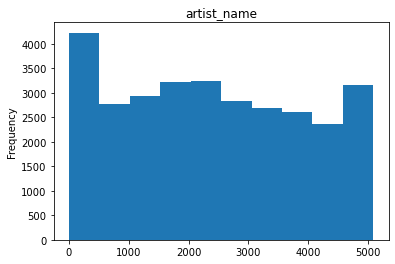

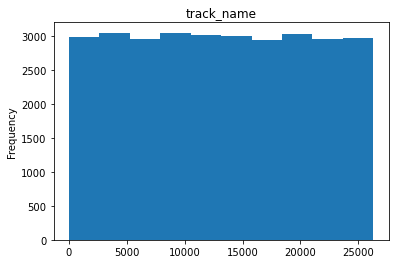

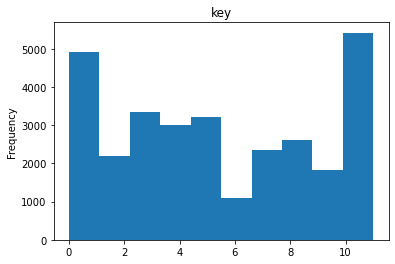

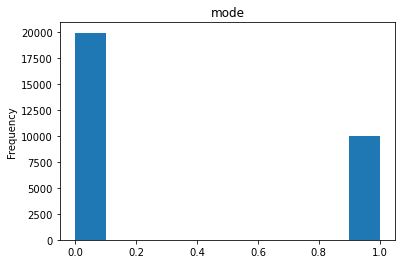

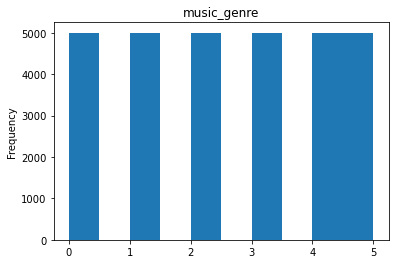

In [7]:
#categorical to numeric
dataset.artist_name = dataset.artist_name.astype("category").cat.codes
dataset.track_name = dataset.track_name.astype("category").cat.codes
dataset.key = dataset.key.astype("category").cat.codes
dataset['mode'] = dataset['mode'].astype("category").cat.codes

music_genre = {"Jazz":0, "Alternative":1, "Country":2, "Rap":3, "Rock":4, "Classical":5}
dataset["music_genre"] = dataset["music_genre"].map(music_genre)


categorical_dataset = copy.deepcopy(dataset.iloc[:, [0,1,8,11,15]])
lst =categorical_dataset.columns.values
for title in lst:
    categorical_dataset[title].plot.hist()
    plt.title(title)
    plt.show()

#### Filling Missing Values

In [8]:
# # First Try
# dataset['duration_ms'].fillna((dataset['duration_ms'].mean()), inplace=True)
# dataset['tempo'].fillna((dataset['tempo'].mean()), inplace=True)
# dataset['artist_name'].fillna((dataset['artist_name'].mode()), inplace=True)
# pd.isna(dataset).sum()

# Second Try
def replace_with_mode_mean(x_, column):
    x = copy.deepcopy(np.array(x_))
    for i in range(len(x)):
        if pd.isnull(x[i]):
            missed_data_genre = dataset.music_genre[i]
            dataset_temp = dataset[(dataset["music_genre"] == missed_data_genre)]
            if column == 'artist_name':
                x[i] = dataset_temp[column].mode()
            else:
                x[i] = dataset_temp[column].mean()
    return x
    
x = replace_with_mode_mean(dataset.artist_name, 'artist_name')
df = pd.DataFrame(x, columns = ['artist_name'])
dataset['artist_name'] = df['artist_name']

x = replace_with_mode_mean(dataset.duration_ms, 'duration_ms')
df = pd.DataFrame(x, columns = ['duration_ms'])
dataset['duration_ms'] = df['duration_ms']

x = replace_with_mode_mean(dataset.tempo, 'tempo')
df = pd.DataFrame(x, columns = ['tempo'])
dataset['tempo'] = df['tempo']

pd.isna(dataset).sum()

artist_name         0
track_name          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
valence             0
music_genre         0
dtype: int64

#### Numerical:

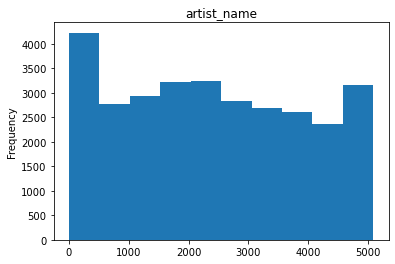

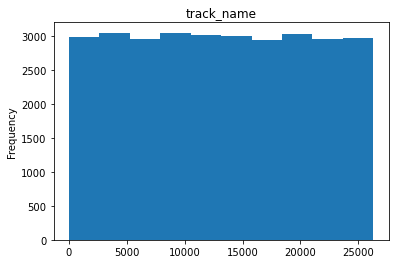

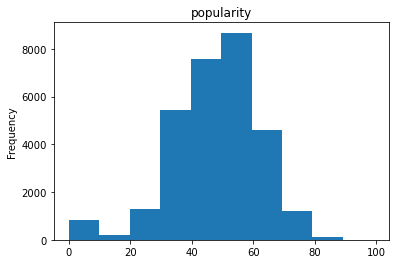

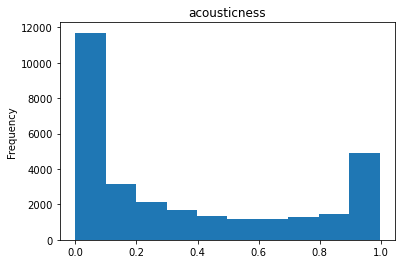

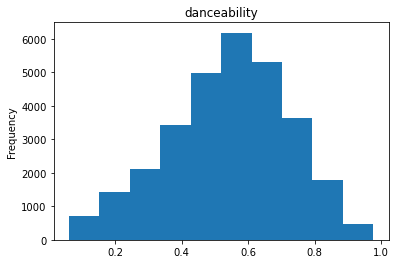

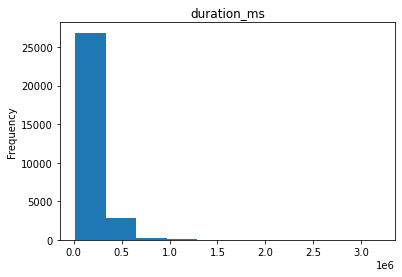

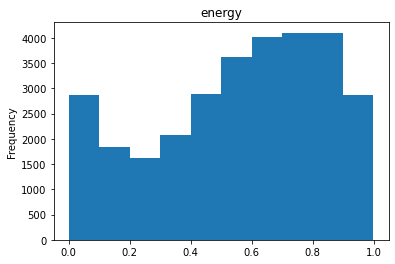

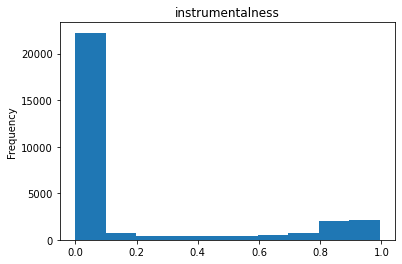

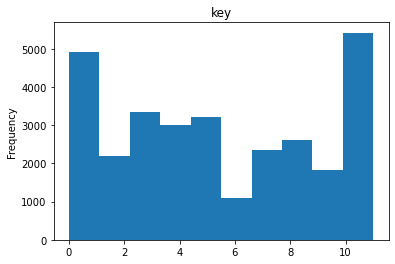

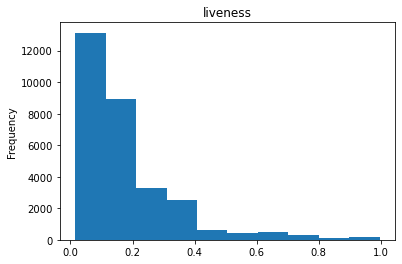

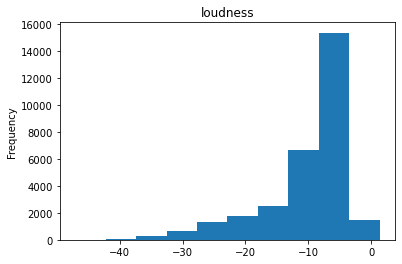

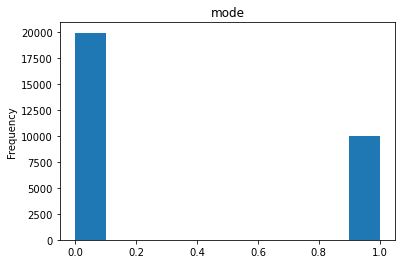

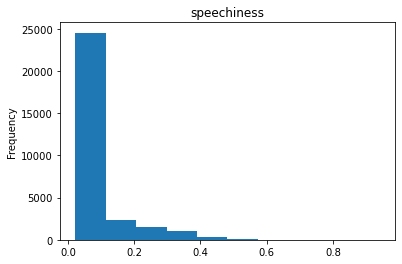

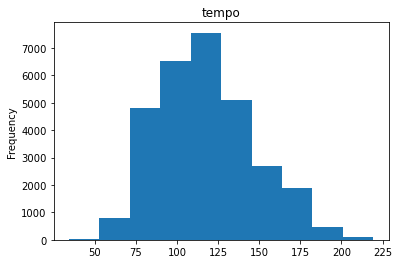

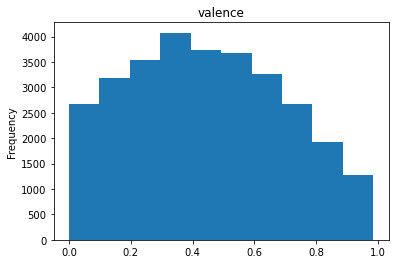

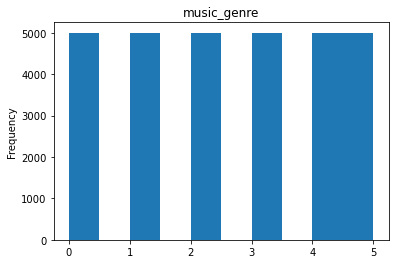

In [9]:
numeric_dataset = copy.deepcopy(dataset.select_dtypes(include=np.number))
lst = numeric_dataset.columns.values
for title in lst:
    numeric_dataset[title].plot.hist()
    plt.title(title)
    plt.show()

## Phase 1
### Part 2:

In [10]:
# #filling missing values ==> done before ==> first and second try
pd.isna(dataset).sum()

artist_name         0
track_name          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
valence             0
music_genre         0
dtype: int64

In [11]:
#normalizing datas
y = dataset.music_genre
dataset.drop("music_genre", axis=1, inplace=True)
dataset = (dataset-dataset.min())/(dataset.max()-dataset.min())
dataset['music_genre'] = y

### Part 7:
#### Manual

In [12]:
# def categorize_numerical_data(numerical_list, parts_num):
#     x = copy.deepcopy(numerical_list)
#     part_len = max(x)/parts_num
#     for i in range(parts_num):
#         for j in range(len(x)):
#             if x[j] >= parts_num*part_len:
#                 x[j] = parts_num-1
#             if x[j] >= i*part_len and x[j] < (i+1)*part_len:
#                 x[j] = i
#     return x

# def calculate_entropy(x):
#     class_list = []
#     class_types = []
#     for element in x:
#         if element not in class_types:
#             class_list.append([element, [0,0,0,0,0,0], 0])
#             class_types.append(element)
#     for class_ in class_list:
#         for i in range(len(x)):
#             if x[i] == class_[0]:
#                 class_[1][dataset.music_genre[i]] += 1
#     for class_ in class_list:
#         entropy = 0
#         for genre in class_[1]:
#             if genre == 0:
#                 continue
#             entropy += genre/sum(class_[1])*math.log2(sum(class_[1])/genre)
#         class_[2] = entropy
#     entropy = 0
#     for class_ in class_list:
#         entropy += sum(class_[1])/sum(x)*class_[2]
#     return entropy

# def calculate_info_gain(x):
#     genres = [0,0,0,0,0,0]
#     for i in range(len(x)):
#         genres[dataset.music_genre[i]] += 1
#     entropy_before = 0
#     for genre in genres:
#         entropy_before += genre/sum(genres)*math.log2(sum(genres)/genre)
#     return entropy_before - calculate_entropy(x)

# info_gain_dict = {}

In [13]:
# categorical_dataset = copy.deepcopy(dataset.iloc[:, [0,1,8,11]])
# lst =categorical_dataset.columns.values
# for title in lst:
#     x = np.array(categorical_dataset[title])
#     info_gain_dict[title] = calculate_info_gain(x)

In [14]:
# lst = numeric_dataset.columns.values
# for title in lst:
#     x = np.array(categorize_numerical_data(numeric_dataset[title], 30))
#     info_gain_dict[title] = calculate_info_gain(x)

In [15]:
# print('Information Gain:')
# info_gain_dict

#### With mutual_info_classif

In [16]:
info_gain_dict = {}
lst = dataset.iloc[:,:15].columns.values
for title in lst:
    info_gain = mutual_info_classif(dataset[title].to_numpy().reshape(-1, 1), dataset['music_genre'].to_numpy())
    info_gain_dict[title] = float(info_gain)
info_gain_dict

{'artist_name': 1.1942962105512653,
 'track_name': 0.31349473999031074,
 'popularity': 0.5120290654152786,
 'acousticness': 0.3594439093392232,
 'danceability': 0.2763390233242693,
 'duration_ms': 0.2745613537146161,
 'energy': 0.32957708845432476,
 'instrumentalness': 0.298627128082563,
 'key': 0.01511207438244666,
 'liveness': 0.014677428498640399,
 'loudness': 0.34671267215568813,
 'mode': 0.032876167064483486,
 'speechiness': 0.21321353102292306,
 'tempo': 0.26009965563856285,
 'valence': 0.14096574227641323}

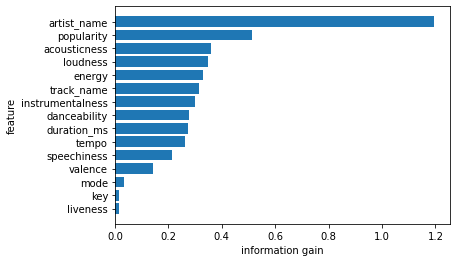

In [17]:
#sorting dictionary
info_gain_dict = dict(sorted(info_gain_dict.items(), key=lambda item: item[1]))

y_axis = list(info_gain_dict.keys())
x_axis = list(info_gain_dict.values())
plt.barh(y_axis,x_axis)
plt.ylabel('feature')
plt.xlabel('information gain')
plt.show()

## Phase 2
### Part 2:

In [18]:
y = dataset.music_genre
# #first try
# dataset.drop("key", axis=1, inplace=True)
# dataset.drop("liveness", axis=1, inplace=True)
# dataset.drop("music_genre", axis=1, inplace=True)
# dataset.drop("mode", axis=1, inplace=True)
# dataset.drop("tempo", axis=1, inplace=True)
# dataset.drop("duration_ms", axis=1, inplace=True)
# dataset.drop("valence", axis=1, inplace=True)

#second try
dataset.drop("key", axis=1, inplace=True)
dataset.drop("liveness", axis=1, inplace=True)
dataset.drop("music_genre", axis=1, inplace=True)
dataset.drop("mode", axis=1, inplace=True)
dataset.drop("valence", axis=1, inplace=True)

x = copy.deepcopy(dataset)

x_train, x_test, y_train, y_test = train_test_split(np.array(x), np.array(y), stratify = np.array(y), test_size=0.2)

### Part 3:
### K-Nearest-Neighbors

In [19]:
scores_test = {}
scores_train = {}
for k in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    
    y_pred_test = knn.predict(x_test)
    y_pred_train = knn.predict(x_train)
    scores_test[k] = metrics.accuracy_score(y_test, y_pred_test)
    scores_train[k] = metrics.accuracy_score(y_train, y_pred_train)

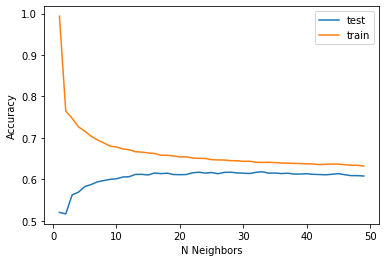

Best N Neighbors for test data: 33
Best Accuracy for test data: 61.81666666666666 %


In [20]:
x_axis = list(scores_test.keys())
y_axis_test = list(scores_test.values())
y_axis_train = list(scores_train.values())
plt.plot(x_axis, y_axis_test)
plt.plot(x_axis, y_axis_train)
plt.ylabel('Accuracy')
plt.xlabel('N Neighbors')
plt.legend(('test','train'))
plt.show()

max_value_test = max(scores_test, key = scores_test.get)
print("Best N Neighbors for test data:", max_value_test)
print("Best Accuracy for test data:", scores_test[max_value_test]*100, '%')

### Part 4:
### Decision Tree

In [21]:
max_depth_list = []
min_samples_leaf_list = []
dtree_test_accuracy_list = []
dtree_train_accuracy_list = []
for max_depth in range(1,20):
    for min_samples_leaf in range(1,15):
        dtree = tree.DecisionTreeClassifier(max_depth = max_depth, min_samples_leaf = min_samples_leaf)
        dtree = dtree.fit(x_train, y_train)
        y_pred_test = dtree.predict(x_test)
        y_pred_train = dtree.predict(x_train)
        
        max_depth_list.append(max_depth)
        min_samples_leaf_list.append(min_samples_leaf)
        dtree_test_accuracy_list.append(metrics.accuracy_score(y_test, y_pred_test))
        dtree_train_accuracy_list.append(metrics.accuracy_score(y_train, y_pred_train))

#### test:

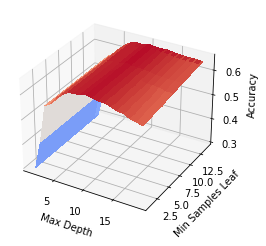

Best Accuracy for test data: 65.64999999999999 %


In [22]:
X = np.array(max_depth_list)
Y = np.array(min_samples_leaf_list)
Z = np.array(dtree_test_accuracy_list)

value_dict = {}
for i in range(len(max_depth_list)):
    value_dict[(X[i], Y[i])] = Z[i]

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

X, Y = np.meshgrid(X, Y)
Z = np.empty(X.shape)
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        Z[i][j] = value_dict[(X[i][j], Y[i][j])]
        
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel('Max Depth')
ax.set_ylabel('Min Samples Leaf')
ax.set_zlabel('Accuracy')
plt.show()
print("Best Accuracy for test data:", np.max(Z)*100, '%')

#### train:

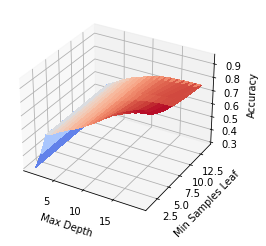

Best Accuracy for train data: 95.78333333333333 %


In [23]:
X = np.array(max_depth_list)
Y = np.array(min_samples_leaf_list)
Z = np.array(dtree_train_accuracy_list)
for i in range(len(max_depth_list)):
    value_dict[(X[i], Y[i])] = Z[i]

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
X, Y = np.meshgrid(X, Y)
Z = np.empty(X.shape)
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        Z[i][j] = value_dict[(X[i][j], Y[i][j])]
        
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel('Max Depth')
ax.set_ylabel('Min Samples Leaf')
ax.set_zlabel('Accuracy')
plt.show()
print("Best Accuracy for train data:", np.max(Z)*100, '%')

### Part 6:
#### K-Nearest-Neighbors

In [24]:
knn = KNeighborsClassifier(n_neighbors = 41)
knn.fit(x_train, y_train)
y_pred_test = knn.predict(x_test)
print('KNN:')
print(metrics.classification_report(y_test, y_pred_test, digits=3))

KNN:
              precision    recall  f1-score   support

           0      0.628     0.546     0.584      1000
           1      0.475     0.355     0.406      1000
           2      0.486     0.633     0.550      1000
           3      0.697     0.727     0.712      1000
           4      0.515     0.548     0.531      1000
           5      0.887     0.863     0.875      1000

    accuracy                          0.612      6000
   macro avg      0.615     0.612     0.610      6000
weighted avg      0.615     0.612     0.610      6000



#### Decision Tree

In [25]:
dtree = tree.DecisionTreeClassifier(max_depth = 9, min_samples_leaf = 5)
dtree = dtree.fit(x_train, y_train)
y_pred_test = dtree.predict(x_test)
print('D-Tree:')
print(metrics.classification_report(y_test, y_pred_test, digits=3))

D-Tree:
              precision    recall  f1-score   support

           0      0.671     0.627     0.648      1000
           1      0.494     0.368     0.422      1000
           2      0.613     0.522     0.564      1000
           3      0.702     0.767     0.733      1000
           4      0.518     0.751     0.613      1000
           5      0.904     0.838     0.870      1000

    accuracy                          0.645      6000
   macro avg      0.650     0.645     0.642      6000
weighted avg      0.650     0.645     0.642      6000



## Phase 3
### Part 1:

In [33]:
# Random Forest
# for testing model
RF = RandomForestClassifier(n_estimators = 100, max_depth = 10, min_samples_leaf = 10)
RF = RF.fit(x_train, y_train)
y_pred_test = RF.predict(x_test)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred_test)*100, '%')

Accuracy: 69.76666666666667 %


### Part 2:

In [37]:
RF_results = {}
max_depth = 10
for n_estimators in range(90,110):
    for min_samples_leaf in range(7,13):
        RF = RandomForestClassifier(n_estimators = n_estimators, max_depth = max_depth, min_samples_leaf = min_samples_leaf)
        RF = RF.fit(x_train, y_train)
        y_pred_test = RF.predict(x_test)
        print('(',n_estimators, max_depth, min_samples_leaf,')', '==>', metrics.accuracy_score(y_test, y_pred_test))
        RF_results[(n_estimators, max_depth, min_samples_leaf)] = metrics.accuracy_score(y_test, y_pred_test)

( 90 10 7 ) ==> 0.6973333333333334
( 90 10 8 ) ==> 0.696
( 90 10 9 ) ==> 0.6951666666666667
( 90 10 10 ) ==> 0.6971666666666667
( 90 10 11 ) ==> 0.6938333333333333
( 90 10 12 ) ==> 0.6953333333333334
( 91 10 7 ) ==> 0.696
( 91 10 8 ) ==> 0.6975
( 91 10 9 ) ==> 0.697
( 91 10 10 ) ==> 0.6963333333333334
( 91 10 11 ) ==> 0.6938333333333333
( 91 10 12 ) ==> 0.6946666666666667
( 92 10 7 ) ==> 0.696
( 92 10 8 ) ==> 0.6958333333333333
( 92 10 9 ) ==> 0.701
( 92 10 10 ) ==> 0.697
( 92 10 11 ) ==> 0.6965
( 92 10 12 ) ==> 0.695
( 93 10 7 ) ==> 0.6968333333333333
( 93 10 8 ) ==> 0.6925
( 93 10 9 ) ==> 0.6955
( 93 10 10 ) ==> 0.6975
( 93 10 11 ) ==> 0.694
( 93 10 12 ) ==> 0.6948333333333333
( 94 10 7 ) ==> 0.6991666666666667
( 94 10 8 ) ==> 0.6976666666666667
( 94 10 9 ) ==> 0.6936666666666667
( 94 10 10 ) ==> 0.6956666666666667
( 94 10 11 ) ==> 0.6948333333333333
( 94 10 12 ) ==> 0.6935
( 95 10 7 ) ==> 0.6991666666666667
( 95 10 8 ) ==> 0.6988333333333333
( 95 10 9 ) ==> 0.6991666666666667
( 95 1

In [38]:
keys = list(RF_results.keys())
RF_accuracy_list = list(RF_results.values())
# n = np.array(RF_accuracy_list)
best_key = keys[np.argmax(np.array(RF_accuracy_list))]
print('best key:', best_key)
print('best accuracy:', RF_results[best_key]*100, '%')

best key: (103, 10, 7)
best accuracy: 70.11666666666667 %


### Part 3:

In [40]:
RF = RandomForestClassifier(n_estimators = 103, max_depth = 10, min_samples_leaf = 7)
RF = RF.fit(x_train, y_train)
y_pred_test = RF.predict(x_test)
print('Random Forest:')
print(metrics.classification_report(y_test, y_pred_test, digits=3))

Random Forest:
              precision    recall  f1-score   support

           0      0.724     0.717     0.721      1000
           1      0.636     0.396     0.488      1000
           2      0.696     0.623     0.658      1000
           3      0.750     0.791     0.770      1000
           4      0.533     0.794     0.638      1000
           5      0.917     0.870     0.893      1000

    accuracy                          0.699      6000
   macro avg      0.709     0.699     0.695      6000
weighted avg      0.709     0.699     0.695      6000



### Part 4:

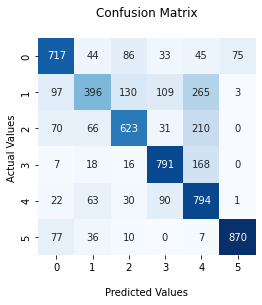

In [45]:
matrix_confusion = metrics.confusion_matrix(y_test, y_pred_test)
mc = sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)
mc.set_title('Confusion Matrix\n');
mc.set_xlabel('\nPredicted Values')
mc.set_ylabel('Actual Values ');
plt.show()